In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from common.util import *
from sklearn.manifold import TSNE

In [2]:
""" seed """
seeds = [1, 2, 3, 4, 5]

""" participant """
name = "self_play"

""" policy """
name_policy = "greedy"

""" condition """
cond = "2on1" # "1on1", "2on1", "2on1", "3on1", or "3on1"

""" speed """
speed = "slow" # "slow", "equal" or "fast"

""" reward """
reward_p = "share" # "indiv" or "share"

In [3]:
""" get distance """
def get_dists(abs_pos_own, abs_pos_adv):
    
    dists = []
    for i in range(len(abs_pos_own)):
        pos_rel = abs_pos_adv[i] - abs_pos_own[i]
        dist = np.sqrt(np.sum(np.square(pos_rel)))
        dists.append(dist)

    return dists


all_rep_v_e = []
all_rep_a_e = []
all_q_mean_e = []
all_q_sd_e = []

all_rep_v_p1 = []
all_rep_a_p1 = []
all_q_mean_p1 = []
all_q_sd_p1 = []

all_rep_v_p2 = []
all_rep_a_p2 = []
all_q_mean_p2 = []
all_q_sd_p2 = []

all_rep_v_p3 = []
all_rep_a_p3 = []
all_q_mean_p3 = []
all_q_sd_p3 = []

all_dist_e_p1 = []
all_dist_e_p2 = []
all_dist_e_p3 = []

""" seed """
for seed in seeds:

    if cond == "1on1":
        rep = np.load("self_play_results/results_1on1_" + name + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
    elif cond == "2on1":
        rep = np.load("self_play_results/results_2on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
    elif cond == "3on1":
        rep = np.load("self_play_results/results_3on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy + "_seed_" + str(seed) + ".npz", allow_pickle=True)
    
    pos_list = np.array(rep["pos"]).squeeze()
    q_list = np.array(rep["q"]).squeeze()
    rep_v_list = np.array(rep["rep_v"]).squeeze()
    rep_a_list = np.array(rep["rep_a"]).squeeze()

    epis = 10
    for epi in range(epis):

        pos_e = np.array(pos_list[epi][0])
        pos_p1 = np.array(pos_list[epi][1])

        rep_v_e = np.array(rep_v_list[epi][0]).squeeze().reshape(-1, 32)
        rep_a_e = np.array(rep_a_list[epi][0]).squeeze().reshape(-1, 32)
        q_e = np.array(q_list[epi][0]).squeeze().reshape(-1, 13)
        mean_q_e = q_e[:].mean(1)
        sd_q_e = q_e[:].std(1)

        rep_v_p1 = np.array(rep_v_list[epi][1]).squeeze().reshape(-1, 32)
        rep_a_p1 = np.array(rep_a_list[epi][1]).squeeze().reshape(-1, 32)
        q_p1 = np.array(q_list[epi][1]).squeeze().reshape(-1, 13)
        mean_q_p1 = q_p1[:].mean(1)
        sd_q_p1 = q_p1[:].std(1)

        dist1 = get_dists(pos_e, pos_p1)

        all_rep_v_e.extend(rep_v_e)
        all_rep_a_e.extend(rep_a_e)
        all_q_mean_e.extend(mean_q_e)
        all_q_sd_e.extend(sd_q_e)

        all_rep_v_p1.extend(rep_v_p1)
        all_rep_a_p1.extend(rep_a_p1)
        all_q_mean_p1.extend(mean_q_p1)
        all_q_sd_p1.extend(sd_q_p1)

        all_dist_e_p1.extend(dist1)

        if cond == "2on1" or cond == "3on1":

            pos_p2 = np.array(pos_list[epi][2])
            dist2 = get_dists(pos_e, pos_p2)

            rep_v_p2 = np.array(rep_v_list[epi][2]).squeeze().reshape(-1, 32)
            rep_a_p2 = np.array(rep_a_list[epi][2]).squeeze().reshape(-1, 32)
            q_p2 = np.array(q_list[epi][2]).squeeze().reshape(-1, 13)
            mean_q_p2 = q_p2[:].mean(1)
            sd_q_p2 = q_p2[:].std(1)

            all_rep_v_p2.extend(rep_v_p2)
            all_rep_a_p2.extend(rep_a_p2)
            all_q_mean_p2.extend(mean_q_p2)
            all_q_sd_p2.extend(sd_q_p2)

            all_dist_e_p2.extend(dist2)

        if cond == "3on1":

            pos_p3 = np.array(pos_list[epi][3])
            dist3 = get_dists(pos_e, pos_p3)

            rep_v_p3 = np.array(rep_v_list[epi][3]).squeeze().reshape(-1, 32)
            rep_a_p3 = np.array(rep_a_list[epi][3]).squeeze().reshape(-1, 32)
            q_p3 = np.array(q_list[epi][3]).squeeze().reshape(-1, 13)
            mean_q_p3 = q_p3[:].mean(1)
            sd_q_p3 = q_p3[:].std(1)

            all_rep_v_p3.extend(rep_v_p3)
            all_rep_a_p3.extend(rep_a_p3)
            all_q_mean_p3.extend(mean_q_p3)
            all_q_sd_p3.extend(sd_q_p3)
            
            all_dist_e_p3.extend(dist3)

In [4]:
""" seed for t-SNE"""
random_seed = 0
np.random.seed(random_seed)

perp = 50
niter = 500

rep_v_e_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_v_e)
rep_a_e_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_a_e)

rep_v_p1_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_v_p1)
rep_a_p1_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_a_p1)

if cond == '2on1' or cond == '3on1':

    rep_v_p2_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_v_p2)
    rep_a_p2_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_a_p2)
    
if cond == '3on1':

    rep_v_p3_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_v_p3)
    rep_a_p3_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_a_p3)

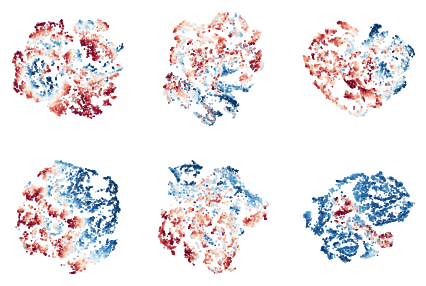

In [7]:
def plot_scatter(ax, data_x, data_y, color, alpha, size, cmin, cmax):

    ax.scatter(data_x, data_y, c=color, alpha=alpha, s=size, vmin=cmin, vmax=cmax, cmap="RdBu_r")
    ax.set_aspect('equal')
    ax.axis('off')


qmin, qmax = 5, 95

cmin_mean_e, cmax_mean_e = np.percentile(all_q_mean_e[:], q=[qmin, qmax])
cmin_mean_p1, cmax_mean_p1 = np.percentile(all_q_mean_p1[:], q=[qmin, qmax])
cmin_sd_e, cmax_sd_e = np.percentile(all_q_sd_e[:], q=[qmin, qmax])
cmin_sd_p1, cmax_sd_p1 = np.percentile(all_q_sd_p1[:], q=[qmin, qmax])

if cond == '2on1' or cond == '3on1':

    cmin_mean_p2, cmax_mean_p2 = np.percentile(all_q_mean_p2[:], q=[qmin, qmax])
    cmin_sd_p2, cmax_sd_p2 = np.percentile(all_q_sd_p2[:], q=[qmin, qmax])
    
if cond == '3on1':

    cmin_mean_p3, cmax_mean_p3 = np.percentile(all_q_mean_p3[:], q=[qmin, qmax])
    cmin_sd_p3, cmax_sd_p3 = np.percentile(all_q_sd_p3[:], q=[qmin, qmax])


size = 0.1
alpha = 1

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(241)
plot_scatter(ax, rep_v_e_2d[:, 0], rep_v_e_2d[:, 1], all_q_mean_e[:], alpha, size, cmin_mean_e, cmax_mean_e)

ax = fig.add_subplot(242)
plot_scatter(ax, rep_v_p1_2d[:, 0], rep_v_p1_2d[:, 1], all_q_mean_p1[:], alpha, size, cmin_mean_p1, cmax_mean_p1)

if cond == '2on1' or cond == '3on1':

    ax = fig.add_subplot(243)
    plot_scatter(ax, rep_v_p2_2d[:, 0], rep_v_p2_2d[:, 1], all_q_mean_p2[:], alpha, size, cmin_mean_p2, cmax_mean_p2)

if cond == '3on1':
    
        ax = fig.add_subplot(244)
        plot_scatter(ax, rep_v_p3_2d[:, 0], rep_v_p3_2d[:, 1], all_q_mean_p3[:], alpha, size, cmin_mean_p3, cmax_mean_p3)

ax = fig.add_subplot(245)
plot_scatter(ax, rep_a_e_2d[:, 0], rep_a_e_2d[:, 1], all_q_sd_e[:], alpha, size, cmin_sd_e, cmax_sd_e)

ax = fig.add_subplot(246)
plot_scatter(ax, rep_a_p1_2d[:, 0], rep_a_p1_2d[:, 1], all_q_sd_p1[:], alpha, size, cmin_sd_p1, cmax_sd_p1)

if cond == '2on1' or cond == '3on1':

    ax = fig.add_subplot(247)
    plot_scatter(ax, rep_a_p2_2d[:, 0], rep_a_p2_2d[:, 1], all_q_sd_p2[:], alpha, size, cmin_sd_p2, cmax_sd_p2)

if cond == '3on1':

    ax = fig.add_subplot(248)
    plot_scatter(ax, rep_a_p3_2d[:, 0], rep_a_p3_2d[:, 1], all_q_sd_p3[:], alpha, size, cmin_sd_p3, cmax_sd_p3)

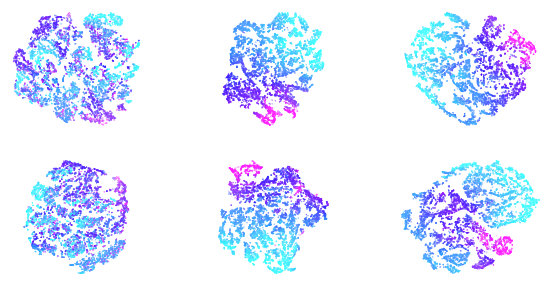

In [8]:
def plot_scatter_dist(ax, data_x, data_y, data_color1, data_color2, data_color3, alpha, size, cond):

    qmin, qmax = 5, 95
    
    _, cmax_d1 = np.percentile(all_dist_e_p1[:], q=[qmin, qmax])
    c_d1 = np.clip(all_dist_e_p1, 0, cmax_d1)

    if cond == '2on1' or cond == '3on1':

        _, cmax_d2 = np.percentile(all_dist_e_p2[:], q=[qmin, qmax])
        c_d2 = np.clip(all_dist_e_p2, 0, cmax_d2)

    if cond == '3on1':

        _, cmax_d3 = np.percentile(all_dist_e_p3[:], q=[qmin, qmax])
        c_d3 = np.clip(all_dist_e_p3, 0, cmax_d3)
    
    if cond == '1on1':

        c_r = np.array(c_d1)/np.max(c_d1)
        c_g = np.array(c_d1)/np.max(c_d1)
        c_b = np.ones(len(c_r))

    elif cond == '2on1':

        c_r = np.array(c_d1)/np.max(c_d1)
        c_g = np.array(c_d2)/np.max(c_d2)
        c_b = np.ones(len(c_r))

    elif cond == '3on1':
        
        c_r = np.array(c_d1)/np.max(c_d1)
        c_g = np.array(c_d2)/np.max(c_d2)
        c_b = np.array(c_d3)/np.max(c_d3)
        
    c_rgb = []
    for i in range(len(c_r)):
        rgb = (c_r[i], c_g[i], c_b[i])
        c_rgb.append(rgb)

    ax.scatter(data_x, data_y, c=c_rgb, alpha=alpha, s=size)
    ax.set_aspect('equal')
    ax.axis('off')
    

fig = plt.figure(figsize=(10,5))

if cond == '1on1':

    ax = fig.add_subplot(221)
    plot_scatter_dist(ax, rep_v_e_2d[:, 0], rep_v_e_2d[:, 1], all_dist_e_p1, _, _, alpha, size, cond)
    ax = fig.add_subplot(222)
    plot_scatter_dist(ax, rep_v_p1_2d[:, 0], rep_v_p1_2d[:, 1], all_dist_e_p1, _, _, alpha, size, cond)

    ax = fig.add_subplot(223)
    plot_scatter_dist(ax, rep_a_e_2d[:, 0], rep_a_e_2d[:, 1], all_dist_e_p1, _, _, alpha, size, cond)
    ax = fig.add_subplot(224)
    plot_scatter_dist(ax, rep_a_p1_2d[:, 0], rep_a_p1_2d[:, 1], all_dist_e_p1, _, _, alpha, size, cond)

if cond == '2on1':

    ax = fig.add_subplot(231)
    plot_scatter_dist(ax, rep_v_e_2d[:, 0], rep_v_e_2d[:, 1], all_dist_e_p1, all_dist_e_p2, _, alpha, size, cond)
    ax = fig.add_subplot(232)
    plot_scatter_dist(ax, rep_v_p1_2d[:, 0], rep_v_p1_2d[:, 1], all_dist_e_p1, all_dist_e_p2, _, alpha, size, cond)
    ax = fig.add_subplot(233)
    plot_scatter_dist(ax, rep_v_p2_2d[:, 0], rep_v_p2_2d[:, 1], all_dist_e_p1, all_dist_e_p2, _, alpha, size, cond)

    ax = fig.add_subplot(234)
    plot_scatter_dist(ax, rep_a_e_2d[:, 0], rep_a_e_2d[:, 1], all_dist_e_p1, all_dist_e_p2, _, alpha, size, cond)
    ax = fig.add_subplot(235)
    plot_scatter_dist(ax, rep_a_p1_2d[:, 0], rep_a_p1_2d[:, 1], all_dist_e_p1, all_dist_e_p2, _, alpha, size, cond)
    ax = fig.add_subplot(236)
    plot_scatter_dist(ax, rep_a_p2_2d[:, 0], rep_a_p2_2d[:, 1], all_dist_e_p1, all_dist_e_p2, _, alpha, size, cond)

if cond == '3on1':

    ax = fig.add_subplot(241)
    plot_scatter_dist(ax, rep_v_e_2d[:, 0], rep_v_e_2d[:, 1], all_dist_e_p1, all_dist_e_p2, all_dist_e_p3, alpha, size, cond)
    ax = fig.add_subplot(242)
    plot_scatter_dist(ax, rep_v_p1_2d[:, 0], rep_v_p1_2d[:, 1], all_dist_e_p1, all_dist_e_p2, all_dist_e_p3, alpha, size, cond)
    ax = fig.add_subplot(243)
    plot_scatter_dist(ax, rep_v_p2_2d[:, 0], rep_v_p2_2d[:, 1], all_dist_e_p1, all_dist_e_p2, all_dist_e_p3, alpha, size, cond)
    ax = fig.add_subplot(244)
    plot_scatter_dist(ax, rep_v_p3_2d[:, 0], rep_v_p3_2d[:, 1], all_dist_e_p1, all_dist_e_p2, all_dist_e_p3, alpha, size, cond)

    ax = fig.add_subplot(245)
    plot_scatter_dist(ax, rep_a_e_2d[:, 0], rep_a_e_2d[:, 1], all_dist_e_p1, all_dist_e_p2, all_dist_e_p3, alpha, size, cond)
    ax = fig.add_subplot(246)
    plot_scatter_dist(ax, rep_a_p1_2d[:, 0], rep_a_p1_2d[:, 1], all_dist_e_p1, all_dist_e_p2, all_dist_e_p3, alpha, size, cond)
    ax = fig.add_subplot(247)
    plot_scatter_dist(ax, rep_a_p2_2d[:, 0], rep_a_p2_2d[:, 1], all_dist_e_p1, all_dist_e_p2, all_dist_e_p3, alpha, size, cond)
    ax = fig.add_subplot(248)
    plot_scatter_dist(ax, rep_a_p3_2d[:, 0], rep_a_p3_2d[:, 1], all_dist_e_p1, all_dist_e_p2, all_dist_e_p3, alpha, size, cond)